# Machine Learning Engineer Nanodegree
## Capstone Project
## Exploring the Data

The ultimate goal of this project is to predict how much a house should be solved in Ames, IA.
The problem is a standing [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The dataset contains a list of information for all houses sold in Ames, Iowa from 2006 through 2010. It contains **2930** observations and a large number of explanatory
variables (**23 nominal, 23 ordinal, 14 discrete, and 20 continuous**). Dean De Cook compiled and published this dataset in 2011 and can be found here [here](http://www.amstat.org/publications/jse/v19n3/decock.pdf). 


#### As discussed in the paper, the data is split into training and testing sets. Therefore, in the spirit of the Kaggle competition, I will work on the formats that have been processed and randomly split into 50-50 portions. The test portion is for Kaggle use. No information on SalePrice is made available. So for this development analysis, I will create the models based on the provided train.csv.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks")

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams


sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 2.5})

### <font color='blue'> This dataset has a LOT of features. The first goal of this analysis is to DIMENSIONALITY REDUCTION. We will select only the most relevant features. Without getting too technical, we will visualize the natural trends in the data. So we have some intuition for any result further down the road.

## <center> $\S$1. Statistical properties of the selling price? </center></font> 

In [3]:
# Load the Ames housing dataset. This will have to be split for evaluation!
data = pd.read_csv('train.csv')
# Success
print "Ames housing dataset has {} data points with {} variables each.".format(*data.shape)
print data.tail(3)

Ames housing dataset has 1460 data points with 81 variables each.
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[3 rows x 81 columns]


In [4]:
# Minimum price of the data
minimum_price = np.min(data.SalePrice)

# Maximum price of the data
maximum_price = np.max(data.SalePrice)

# Mean price of the data
mean_price = np.mean(data.SalePrice)

# Median price of the data
median_price = np.median(data.SalePrice)

# Standard deviation of prices of the data
std_price = np.std(data.SalePrice)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,415.29


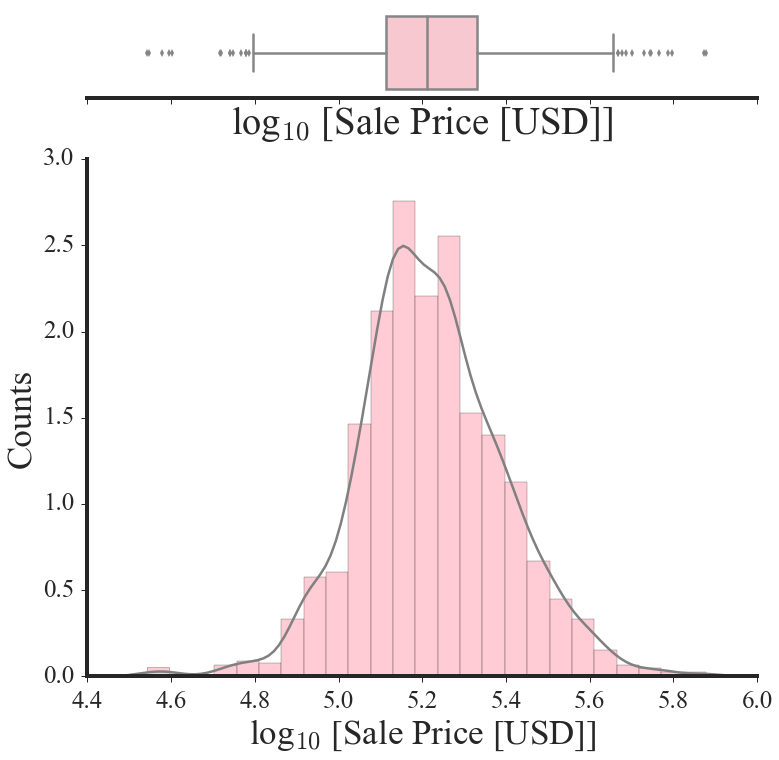

In [5]:
#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = fig_size
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(np.log10(data.SalePrice), ax=ax_box, color='Pink');
sns.distplot(np.log10(data.SalePrice), ax=ax_hist, color='grey', norm_hist=False, bins=25, hist_kws={'alpha': 0.8, 'color': 'pink'});

ax_box.set(yticks=[], xlabel='log$_{10}$ [Sale Price [USD]]')
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True)

plt.xlabel('log$_{10}$ [Sale Price [USD]]', fontsize=35)
plt.ylabel('Counts',  fontsize=35);
#plt.xlim(1e4, 1e6);
plt.yticks(fontsize=25);
plt.xticks(fontsize=25);#, format)
#plt.semilogx();
plt.savefig('SalePriceStats.pdf', dpi=400)

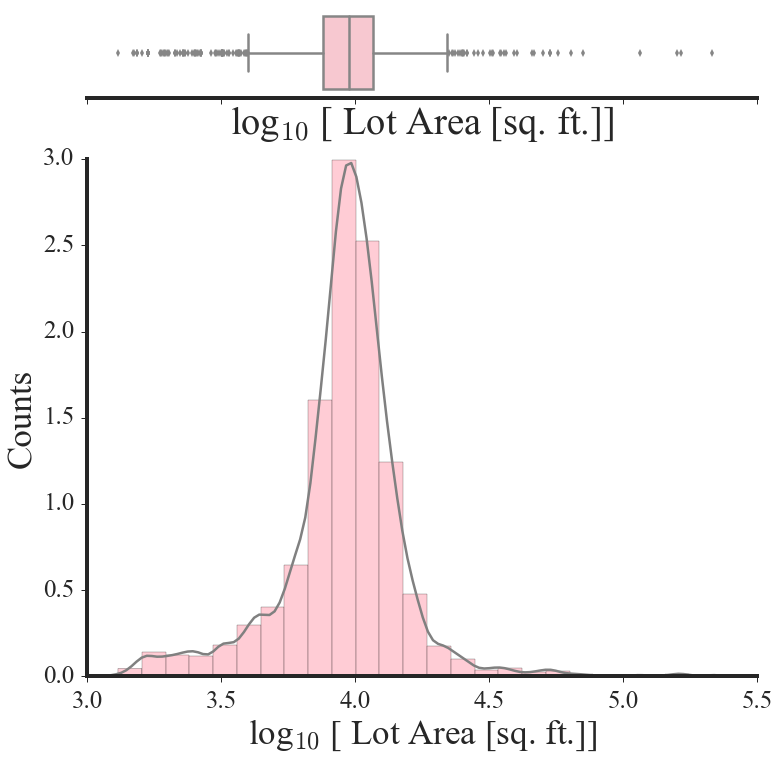

In [6]:
## Lot Area
plt.rcParams["figure.figsize"] = fig_size
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(np.log10(data.LotArea), ax=ax_box, color='Pink');
sns.distplot(np.log10(data.LotArea), ax=ax_hist, color='grey', norm_hist=False, bins=25, hist_kws={'alpha': 0.8, 'color': 'pink'});

ax_box.set(yticks=[], xlabel='log$_{10}$ [ Lot Area [sq. ft.]]')
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True)

plt.xlabel('log$_{10}$ [ Lot Area [sq. ft.]]', fontsize=35)
plt.ylabel('Counts',  fontsize=35);
#plt.xlim(1e4, 1e6);
plt.yticks(fontsize=25);
plt.xticks(fontsize=25);#, format)
#plt.semilogx();
plt.savefig('SalePriceStats.pdf', dpi=400)

In [2]:
#data_new.drop(['YrSold' ], axis =1)

columns_noncont = ["MSZoning", "Neighborhood", "Condition1",
                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond", "SalePrice"]

cont_features = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "YearRemodAdd", "GarageYrBlt", "MasVnrArea", 
                 "LotArea", "BsmtFinSF1", "WoodDeckSF", "OpenPorchSF", "2ndFlrSF", "BsmtUnfSF", "ScreenPorch", 
                 "PoolArea", "3SsnPorch", "BsmtFinSF2", "MiscVal", "LowQualFinSF", "EnclosedPorch", "Age", "LotFrontage"]            
data_all = data_new[columns_noncont]
print np.shape(data_all)

(1460, 23)


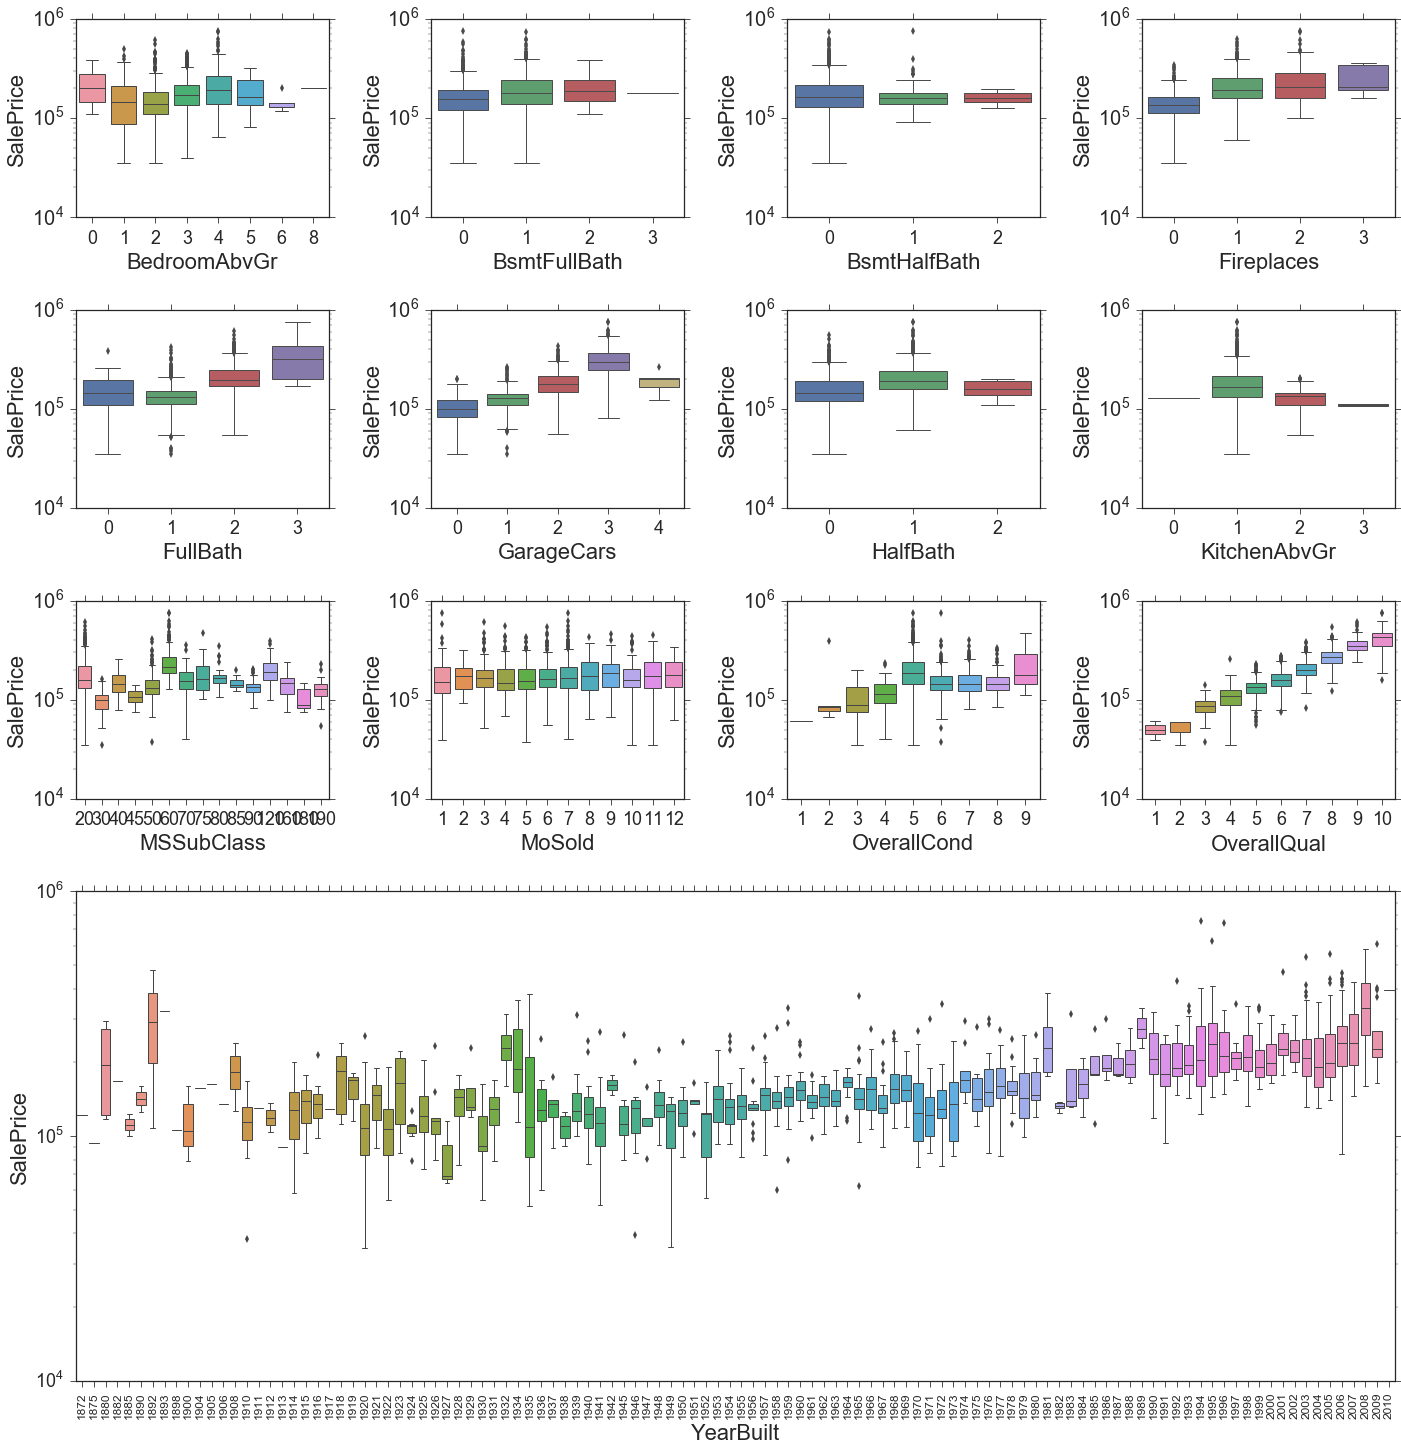

In [9]:
# Discrete features.
sns.set_context("paper", font_scale=2.5, rc={"lines.linewidth": 1.})

discrete_features = sorted(list(set(list(data.columns[(data.dtypes == 'int64') | 
                                                      (data.dtypes == 'float') ][1:-1])) - set(cont_features)))
plt.figure(figsize=(20, 40))

for i, feature in enumerate(discrete_features[0:-2],1):
    if feature not in cont_features:
        plt.subplot(10, 4, i)
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        #g.set(xticklabels=[])
        plt.xticks( rotation=0, fontsize=18)
        plt.semilogy()
        
plt.tight_layout()
ax1 = plt.subplot2grid((10,4), (3,13), colspan=4)
g = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
plt.xticks( rotation=90, fontsize=12)
plt.semilogy()
plt.yticks(fontsize=18)
plt.savefig('DiscreteFeatures.pdf')

In [ ]:
# Discrete features.
sns.set_context("poster", font_scale=12, rc={"lines.linewidth": 10.})

category_features = sorted(list(set(list(data.columns[data.dtypes == object][1:-1])) - set(cont_features)))
plt.figure(figsize=(180, 250))

for i, feature in enumerate(category_features[1:-1],1):
    if feature not in cont_features:
        ax1 = plt.subplot(10, 6, i)
        # Determine the order of boxes
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        plt.xticks( rotation=45, fontsize = 100)
        #plt.yticks(())
        plt.semilogy()
        plt.yticks(fontsize=100)
        g.set(yticks = [], ylabel='')
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.55)

plt.savefig('CategoricalFeatures.pdf')

In [5]:
def pairsplot(df, features):
    g = sns.pairplot(df, x_vars=features, y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg");
    return g

In [6]:
cat_columns = sorted(data.select_dtypes(['object']).columns)

for column in cat_columns:
    data[column] = data[column].astype('category')

data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

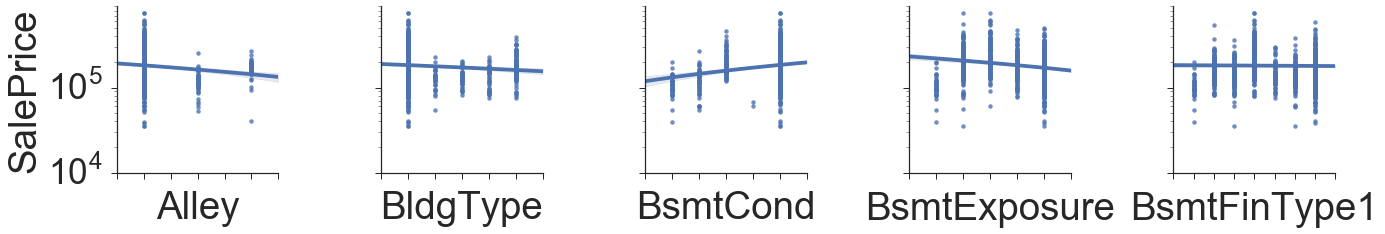

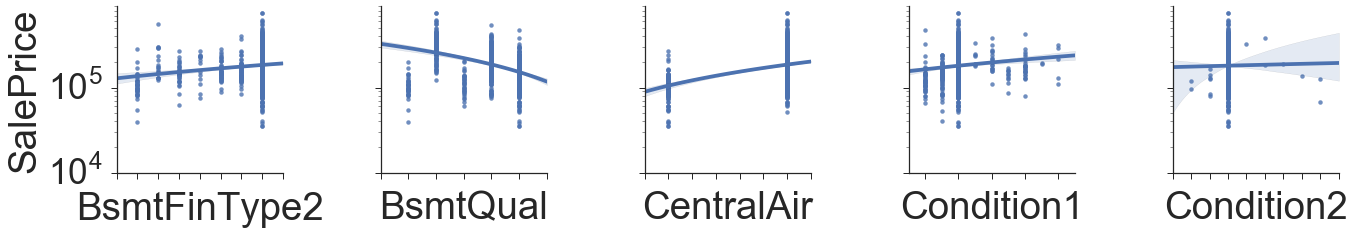

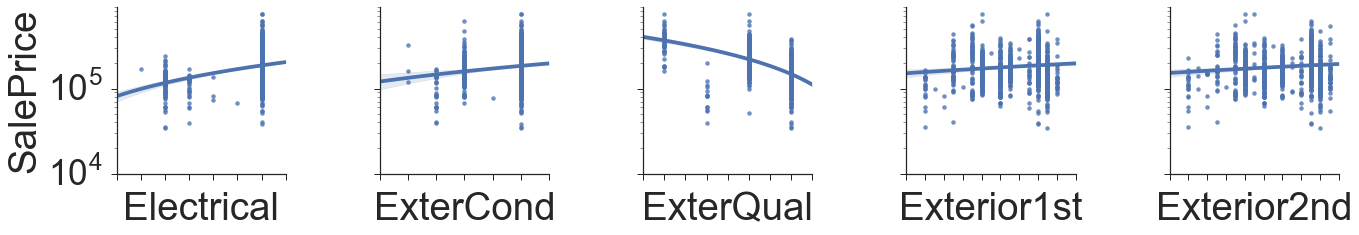

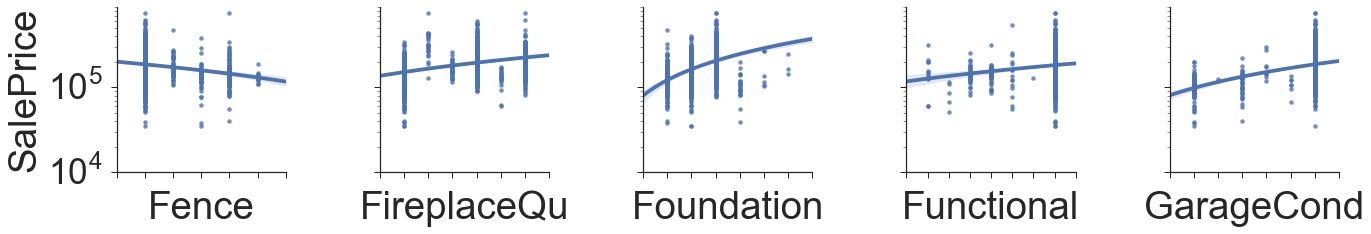

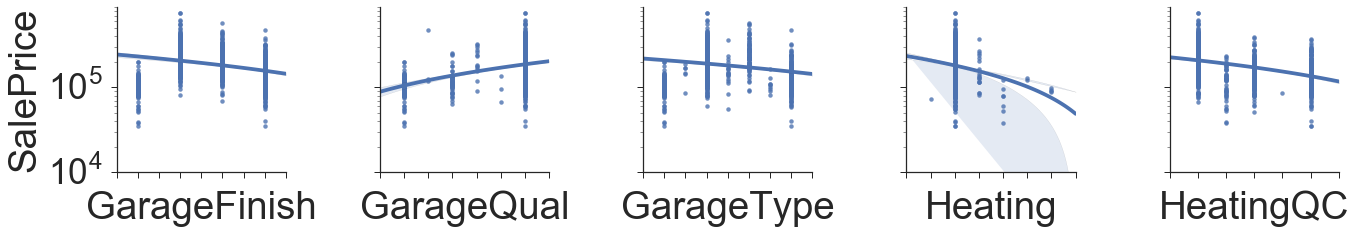

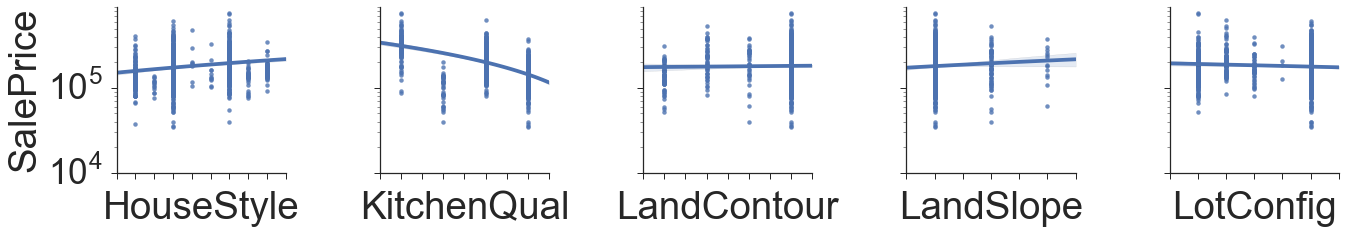

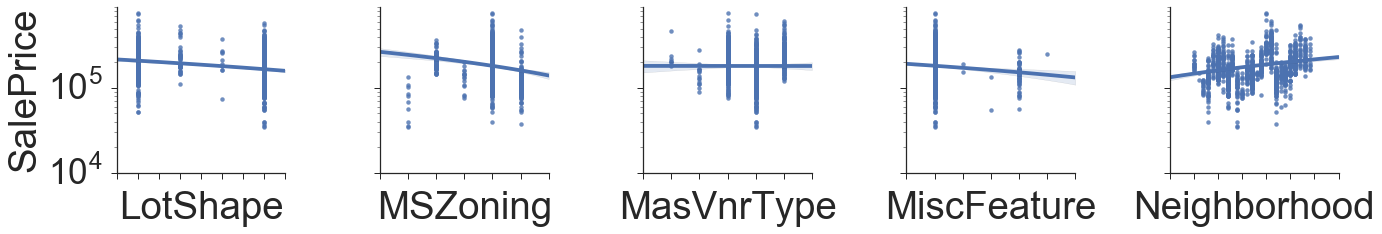

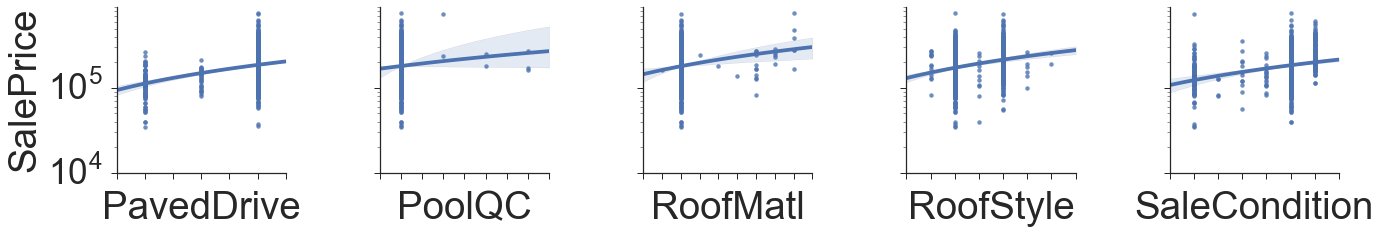

In [7]:
for j in range(0, len(cat_columns)-5, 5):
    g = pairsplot(data, cat_columns[j:j+5])
    plt.ylim(1e4,)
    g.set(xticklabels=[])
    plt.semilogy()
#pairsplot(data_continuous, data_continuous.columns[14:19])